**Nama    : Della Shanda Anggrivani**

**NIM     : 24060121120024**

**Dataset : Glass Identification**

**Link    : https://archive.ics.uci.edu/dataset/42/glass+identification**

**Import Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import library yang dibutuhkan
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Mendefinisikan link dataset
file_path = "/content/drive/MyDrive/Praktikum ML/glass.data"

# Mendefinisikan list beserta kolom-kolom (attribute) dataset
df = pd.read_csv(file_path, names=['RI', 'Na', 'Mg', 'AI', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'])

In [ ]:
df.info()

df['Type of glass'] = df['Type of glass'].astype(str)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   AI             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type of glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


Penjelasan:
- `df.info()` memberikan informasi tentang DataFrame seperti jumlah baris, nama dan tipe data kolom, serta penggunaan memori. Dalam hasilnya, dapat dilihat bahwa DataFrame memiliki 214 baris dan 10 kolom, dengan 9 kolom memiliki tipe data float64 dan satu kolom dengan tipe data int64.

- `df['Type of glass'] = df['Type of glass'].astype(str)` mengubah tipe data kolom 'Type of glass' dari int64 ke str (string). Hal ini bisa berguna jika 'Type of glass' seharusnya berisi kategori atau label, dan penggunaan tipe data string lebih sesuai untuk representasi tersebut.


In [ ]:
features = ['RI', 'Na', 'Mg', 'AI', 'Si', 'K', 'Ca', 'Ba', 'Fe']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:, ['Type of glass']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

Penjelasan kode :

1. Variabel `features` berisi daftar nama kolom yang akan dianggap sebagai fitur atau variabel independen. Dalam hal ini, fitur-fitur tersebut adalah 'RI', 'Na', 'Mg', 'AI', 'Si', 'K', 'Ca', 'Ba', dan 'Fe'.

2. `x = df.loc[:, features].values` menghasilkan matriks fitur `x` dengan memilih kolom-kolom yang terdapat dalam `features` dari DataFrame `df`. Penggunaan `.loc[:, features]` mengambil seluruh baris (`:`) dari DataFrame untuk kolom-kolom yang terdapat dalam `features`. `.values` mengubah DataFrame menjadi representasi array NumPy.

3. `y = df.loc[:, ['Type of glass']].values` menghasilkan array target `y` dengan memilih kolom 'Type of glass' dari DataFrame `df`. Dalam hal ini, `y` akan berisi nilai target atau variabel dependen.

4. `x = StandardScaler().fit_transform(x)`: Baris ini menggunakan `StandardScaler` dari modul scikit-learn untuk melakukan penskalaan standar pada matriks fitur `x`. Penskalaan standar dilakukan dengan mengurangkan rata-rata dari setiap fitur dan membagi hasilnya dengan standar deviasi.
   - `StandardScaler()`: Menciptakan objek penskalaan standar.
   - `fit_transform(x)`: Metode ini melakukan penskalaan standar pada matriks fitur `x`, dengan menghitung rata-rata dan deviasi standar dari setiap fitur dan kemudian mengubah nilai-nilai fitur tersebut sesuai dengan skala yang telah dihitung.


In [ ]:
print(df['Type of glass'].unique())

['1' '2' '3' '5' '6' '7']


Penjelasan:
- `df['Type of glass'].unique()` digunakan untuk mendapatkan nilai unik dari kolom 'Type of glass'. Hasilnya adalah array yang berisi nilai unik dari kolom tersebut.

Hasil cetakan menunjukkan bahwa kolom 'Type of glass' sekarang memiliki nilai unik '1', '2', '3', '5', '6', dan '7'. Sebelumnya, kolom ini memiliki tipe data int64, tetapi setelah operasi `astype(str)` pada kode sebelumnya, nilai-nilai ini sekarang direpresentasikan sebagai string.

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['Principal Component 1', 'Principal Component 2'])

print(principalDf.describe())

       Principal Component 1  Principal Component 2
count           2.140000e+02             214.000000
mean            6.640586e-17               0.000000
std             1.588381e+00               1.435164
min            -4.432540e+00              -1.816556
25%            -6.575585e-01              -1.021452
50%            -5.651885e-02              -0.659192
75%             6.342901e-01               0.634529
max             7.138698e+00               6.193445


Penjelasan kode:
Kode di atas menggunakan metode Principal Component Analysis (PCA) dari library scikit-learn untuk mengurangi dimensi dari data yang diwakili oleh variabel `x` menjadi dua komponen utama (`Principal Component 1` dan `Principal Component 2`).

- `pca = PCA(n_components=2)`: Inisialisasi objek PCA dengan mengatur jumlah komponen utama yang diinginkan menjadi 2.
  
- `principalComponents = pca.fit_transform(x)`: Melakukan transformasi PCA pada data `x`.

- `principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])`: Membuat DataFrame baru (`principalDf`) dari hasil transformasi PCA.

- `print(principalDf.describe())`: Mencetak ringkasan statistik dari DataFrame `principalDf`.

Hasil cetakan menunjukkan statistik deskriptif untuk kedua komponen utama. Sebagai contoh:
- `count`: Jumlah data.
- `mean`: Rata-rata.
- `std`: Standar deviasi.
- `min`, `25%`, `50%`, `75%`, `max`: Nilai minimum, kuartil, median, dan maksimum.

Penjelasan hasil:

- Deskripsi statistik menunjukkan bahwa kedua komponen utama memiliki rata-rata (mean) mendekati 0, menunjukkan bahwa keduanya tidak bias ke arah nilai positif atau negatif.
- Standar deviasi (std) dari komponen utama pertama lebih besar dari yang kedua, menunjukkan bahwa komponen utama pertama menangkap lebih banyak variasi dalam data.
- Nilai minimum dan maksimum menunjukkan rentang nilai untuk setiap komponen utama.
- Persentil ke-25, 50, dan 75 menunjukkan distribusi nilai untuk setiap komponen utama.

In [ ]:
finalDf = pd.concat([principalDf, df[['Type of glass']]], axis = 1)

Penjelasan:
Code di atas menggunakan library pandas untuk menggabungkan dua DataFrames, yaitu `principalDf` dan `df[['Type of glass']]`, menjadi satu DataFrame baru yang disimpan dalam variabel `finalDf`. Berikut penjelasan untuk setiap bagian dari kode tersebut:

- `pd.concat`: Ini adalah fungsi dari library pandas yang digunakan untuk menggabungkan DataFrames. Fungsi ini mengambil sejumlah DataFrames atau Series dan menggabungkannya berdasarkan sumbu tertentu.

- `[principalDf, df[['Type of glass']]]`: Ini adalah daftar DataFrames yang akan digabungkan. `principalDf` adalah salah satu DataFrame yang akan digabungkan, dan `df[['Type of glass']]` adalah DataFrame lainnya. Bagian `df[['Type of glass']]` digunakan untuk memilih hanya kolom 'Type of glass' dari DataFrame `df`.

- `axis=1`: Parameter ini menunjukkan bahwa penggabungan akan dilakukan berdasarkan sumbu kolom (horizontal). Artinya, DataFrames akan digabungkan berdampingan.

- `finalDf = ...`: Hasil penggabungan disimpan dalam variabel baru yang disebut `finalDf`.

Dengan menggunakan `pd.concat` dengan `axis=1`, kita menggabungkan `principalDf` dan `df[['Type of glass']]` berdampingan berdasarkan kolom, sehingga membentuk DataFrame baru `finalDf` yang memiliki semua kolom dari `principalDf` dan kolom 'Type of glass' dari DataFrame `df`.

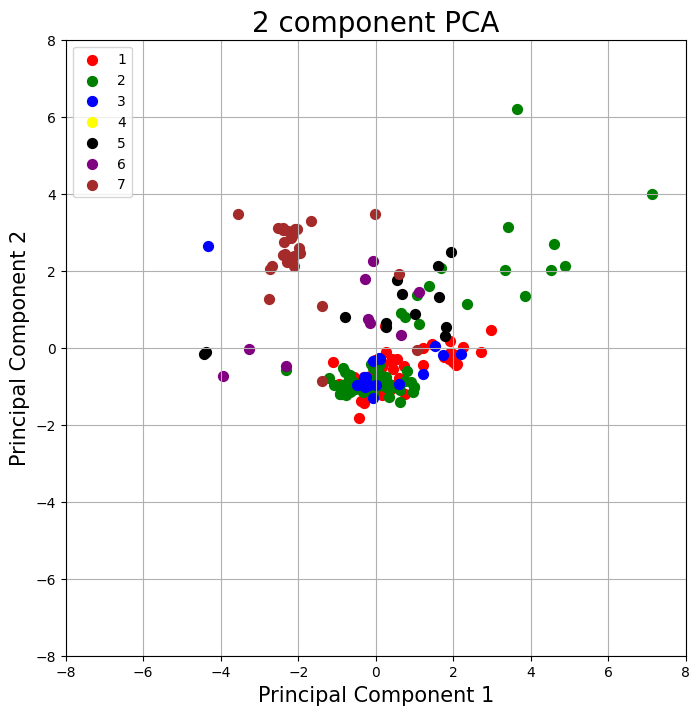

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['1', '2', '3', '4', '5', '6', '7']
colors = ['red', 'green', 'blue', 'yellow', 'black', 'purple', 'brown']

ax.set_xlim([-8, 8])
ax.set_ylim([-8, 8])

for target, color in zip(targets, colors):
  indicesToKeep = finalDf['Type of glass'] == target
  ax.scatter(finalDf.loc[indicesToKeep, 'Principal Component 1']
             , finalDf.loc[indicesToKeep, 'Principal Component 2']
             , c = color
             , s = 50)
  ax.legend(targets)
  ax.grid()

Penjelasan hasil :

Plot di atas menunjukkan hasil Principal Component Analysis (PCA) dua komponen pada dataset gelas. PCA adalah metode reduksi dimensi yang dapat digunakan untuk mengurangi jumlah fitur dalam dataset tanpa kehilangan terlalu banyak informasi. Dalam kasus ini, PCA telah digunakan untuk mengurangi 9 fitur asli dataset menjadi 2 komponen utama.

Sumbu x dan y dari plot menunjukkan nilai komponen utama pertama dan kedua, masing-masing. Setiap titik dalam plot mewakili sampel data, dan warna titik menunjukkan jenis gelas yang sesuai.

Dapat kita lihat dari plot bahwa sampel data dari jenis gelas yang berbeda umumnya mengelompok bersama. Ini menunjukkan bahwa komponen utama yang diekstraksi oleh PCA dapat menangkap variasi dalam dataset yang terkait dengan jenis gelas.

Selain itu, kita juga dapat mengamati bahwa beberapa jenis gelas memiliki tumpang tindih. Hal ini menunjukkan bahwa komponen utama yang diekstraksi oleh PCA tidak dapat sepenuhnya memisahkan semua jenis gelas. Namun, PCA tetap merupakan metode yang berguna untuk reduksi dimensi dan visualisasi data.

In [ ]:
pca.explained_variance_ratio_

array([0.27901819, 0.2277858 ])

Penjelasan kode:
'pca.explained_variance_ratio_': Atribut ini menghasilkan array yang berisi rasio varian yang dijelaskan oleh setiap komponen utama. Dalam hal ini, array tersebut memiliki dua elemen, yang masing-masing menyatakan persentase varian yang dijelaskan oleh komponen utama pertama dan kedua.

Penjelasan hasil:

 Setelah menerapkan PCA, komponen utama pertama (PC1) menjelaskan sekitar 27.9% dari total varians dalam data, sedangkan komponen utama kedua (PC2) menjelaskan sekitar 22.8%. Jumlah kedua rasio ini memberikan gambaran tentang seberapa baik representasi data yang telah direduksi dimensinya oleh dua komponen utama pertama.